<a href="https://colab.research.google.com/github/divyaprabha123/Machine-Learning-with-a-Heart/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease

**Import Dependencies and read data**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [0]:
train = pd.read_csv("https://s3.amazonaws.com/drivendata/data/54/public/train_values.csv")

In [0]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [0]:
target = pd.read_csv("https://s3.amazonaws.com/drivendata/data/54/public/train_labels.csv")

In [0]:
target.head() 

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [0]:
train["heart_disease_present"] = target["heart_disease_present"]


In [0]:
test = pd.read_csv("https://s3.amazonaws.com/drivendata/data/54/public/test_values.csv")

In [0]:
test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [0]:
sample_submit= pd.read_csv("https://s3.amazonaws.com/drivendata/data/54/public/submission_format.csv")

In [0]:
sample_submit.head()

,patient_id,heart_disease_present
0,olalu7,0.5
1,z9n6mx,0.5
2,5k4413,0.5
3,mrg7q5,0.5
4,uki4do,0.5


In [0]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


**Visualizations**

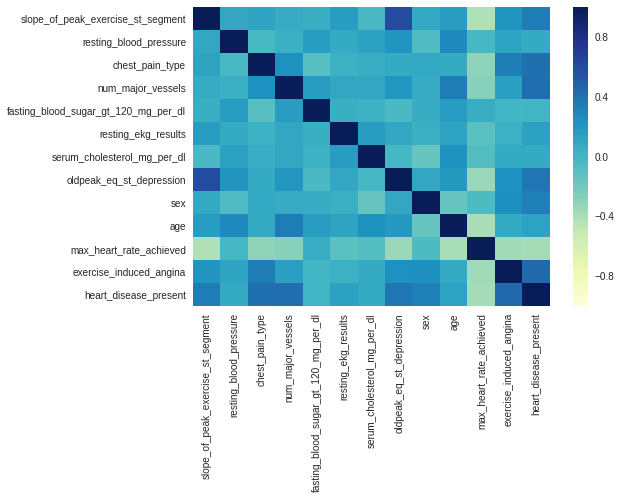

In [0]:
sns.heatmap(train.corr(),cmap='YlGnBu')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


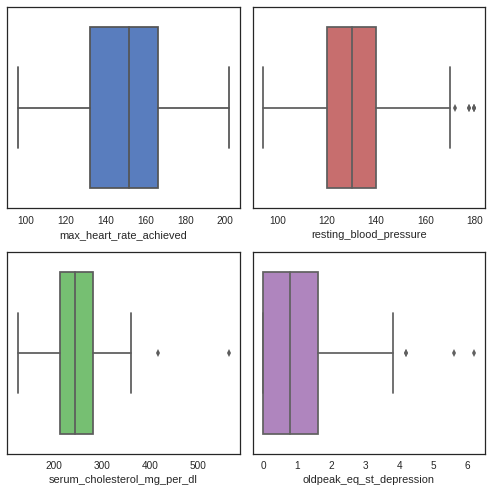

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7))
#sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.boxplot(train["max_heart_rate_achieved"], color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.boxplot(train["resting_blood_pressure"], color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.boxplot(train["serum_cholesterol_mg_per_dl"], color="g", ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.boxplot(train["oldpeak_eq_st_depression"], color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# **Mean Encoding and Outlier Detection**

In [0]:
columns = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved', 'oldpeak_eq_st_depression']
for c in columns:
  Upperbound, Lowerbound = np.percentile(train[c],[1,99])
  train[c] = np.clip(train[c], Upperbound, Lowerbound)
  test[c] = np.clip(test[c], Upperbound, Lowerbound)

In [0]:
cat_columns = ['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels',
               'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results', 
               'sex','exercise_induced_angina']

for c in cat_columns:
  train[c+'_mean_target'] = train[c].map(train.groupby(train[c]).heart_disease_present.mean())
  test[c+'_mean_target'] = test[c].map(train.groupby(train[c]).heart_disease_present.mean())

In [0]:
X = train.drop(columns=['patient_id', 'heart_disease_present','slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels',
               'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results', 
               'sex','exercise_induced_angina'])
y = train["heart_disease_present"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=44)

In [0]:
X_train.shape, X_val.shape

((144, 13), (36, 13))

In [0]:
model = RandomForestClassifier(n_estimators=30, min_samples_leaf=1, max_features=0.5)

In [0]:
model.fit(X_train, y_train)
predictions = model.predict(X_train)
predictions_val = model.predict(X_val)

sum(y_train==predictions)/len(X_train), sum(y_val==predictions_val)/len(X_val) 

(0.9930555555555556, 0.8055555555555556)

**Submission**

In [0]:
predictions_test = model.predict_proba(test.drop(columns = ['patient_id','slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels',
               'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results', 
               'sex','exercise_induced_angina']))

In [0]:
test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,...,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_mean_target,thal_mean_target,chest_pain_type_mean_target,num_major_vessels_mean_target,fasting_blood_sugar_gt_120_mg_per_dl_mean_target,resting_ekg_results_mean_target,sex_mean_target,exercise_induced_angina_mean_target
0,olalu7,2,reversible_defect,170.0,1,0,0,2,288.0,0.2,...,159.0,0,0.626667,0.756757,0.307692,0.273585,0.443709,0.510638,0.556452,0.292683
1,z9n6mx,1,normal,138.0,4,0,0,0,183.0,1.4,...,182.0,0,0.268817,0.204082,0.719512,0.273585,0.443709,0.364706,0.196429,0.292683
2,5k4413,2,reversible_defect,120.0,4,0,0,2,177.0,2.5,...,120.0,1,0.626667,0.756757,0.719512,0.273585,0.443709,0.510638,0.556452,0.771930
3,mrg7q5,1,normal,102.0,3,1,0,0,318.0,0.0,...,160.0,0,0.268817,0.204082,0.228070,0.594595,0.443709,0.364706,0.196429,0.292683
4,uki4do,2,normal,138.0,4,1,0,2,166.0,3.6,...,125.0,1,0.626667,0.204082,0.719512,0.594595,0.443709,0.510638,0.556452,0.771930


In [0]:
predictions_test

In [0]:
sample_submit["heart_disease_present"] = predictions_test[:,1]

In [0]:
sample_submit.to_csv("sample.csv")